### Aula Regressão Logística ###

**Link da Aula:** https://colab.research.google.com/drive/1JFQmTwsoHmX19G5JzjNwWESBmSyG_qpx?usp=**sharing**

**Propósito**: Prever valores categóricos binários (0 ou 1, verdadeiro ou falso).

**Como Funciona**: A regressão logística usa uma função sigmoide (logística) para modelar a probabilidade de um determinado evento acontecer (resultado binário). Em vez de prever um valor contínuo, ela prevê a probabilidade de um evento, que é então convertida em uma classe (0 ou 1).

**Exemplo de Uso**: Prever se um passageiro sobreviveu ou não no Titanic com base em características como classe, idade, sexo, etc.

**Resumo**:

* A regressão linear prevê valores contínuos e pode ser usada em problemas de regressão.

* A regressão logística, embora comece com uma abordagem semelhante à regressão linear, aplica uma função sigmoide para prever probabilidades em problemas de classificação binária.

* A regressão logística ajusta o modelo da regressão linear para que possa ser usado para problemas de classificação, ao invés de prever valores contínuos.

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# permite a exibição de gráficos diretamente no notebook/ abrir janela externa
%matplotlib inline

In [ ]:
!wget https://github.com/cedmenezes/estudos/raw/main/titanic_data.csv

--2024-08-30 11:53:26--  https://github.com/cedmenezes/estudos/raw/main/titanic_data.csv
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cedmenezes/estudos/main/titanic_data.csv [following]
--2024-08-30 11:53:26--  https://raw.githubusercontent.com/cedmenezes/estudos/main/titanic_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic_data.csv’

titanic_data.csv    100%[===================>]  58.89K  --.-KB/s    in 0.009s  

2024-08-30 11:53:26 (6.72 MB/s) - ‘titanic_data.csv’ saved [60302/60302]



In [ ]:
# ler dataset
td = pd.read_csv('titanic_data.csv')

**EDA - Exploratory Data Analysis**

In [ ]:
td.head()  # mostra as primeiras 5 linhas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# gerar resumo estatístico
td.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# info dados - valores nulos / tipo coluna - object = string
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Preparação dos dados:**

In [ ]:
# Excluindo as colunas 'PassengerId', 'Name', 'Ticket', 'Cabin'
td.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'],
        axis=1,  # Quero apagar colunas
        inplace=True  # Realmente modifica o DataFrame
)

In [ ]:
td.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

**Tratando os valores faltantes:**

In [ ]:
# contando os valores faltantes
td.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
# !
# criando o dataframe sex com a coluna 'Sex' convertida para valores numéricos
sex = pd.get_dummies(td['Sex'], drop_first=True)
print(sex)

      male
0     True
1    False
2    False
3    False
4     True
..     ...
886   True
887  False
888  False
889   True
890   True

[891 rows x 1 columns]


In [ ]:
# criando o dataframe embark com a coluna 'Embarked' convertida para valores numéricos
embark = pd.get_dummies(td['Embarked'],drop_first=True)
print(embark)

# A função get_dummies() converte variáveis categóricas em variáveis numéricas
# Com o parâmetro drop_first=True, ela remove uma categoria para evitar a multicolinearidade

In [ ]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   male      891 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(1)
memory usage: 49.7+ KB


*Só para entendermos melhor as consolidações:*

Criando uma cópia do *Dataframe* sem a coluna *Embarked*:

In [ ]:
td2 = td[['Survived','Pclass','Age','SibSp','Parch','Fare','male']]

In [ ]:
# agrupar por sexo
print(td2.groupby('male').mean())

       Survived    Pclass        Age     SibSp     Parch       Fare
male                                                               
False  0.742038  2.159236  27.915709  0.694268  0.649682  44.479818
True   0.188908  2.389948  30.726645  0.429809  0.235702  25.523893


In [ ]:
print(td2.groupby('Pclass').mean())

        Survived        Age     SibSp     Parch       Fare      male
Pclass                                                              
1       0.629630  38.233441  0.416667  0.356481  84.154687  0.564815
2       0.472826  29.877630  0.402174  0.380435  20.662183  0.586957
3       0.242363  25.140620  0.615071  0.393075  13.675550  0.706721


In [ ]:
# agrupar por classe
print(td2.groupby('Pclass').median())

        Survived   Age  SibSp  Parch     Fare  male
Pclass                                             
1            1.0  37.0    0.0    0.0  60.2875   1.0
2            0.0  29.0    0.0    0.0  14.2500   1.0
3            0.0  24.0    0.0    0.0   8.0500   1.0


Há 3 maneiras de lidarmos com dados faltantes (*missing data*):

- Apagarmos a coluna toda (só quando houverem muitos e muitos dados faltantes nesta coluna e julgarmos pouca relevância nestes dados). É o que fizemos com a coluna *Cabin* lá em cima, lembra??
- Apagarmos as linhas com dados faltantes, mas somente forem muito poucas linhas, ou seja, quando isso não provocar perda significativa de informação.
- Imputação: preencher os dados faltantes com a média, a mediana ou a moda do grupo.

In [ ]:
print(td['Age'].median())  #mediana
# criando função para inserir idade faltante
def insert_age(cols):
    Age = cols.iloc[0]
    Pclass = cols.iloc[1]
    if pd.isnull(Age):
        if Pclass == 1: return 37  # valor pego do agrupamento acima
        elif Pclass == 2: return 29  # idem
        else: return 24  # idem
    else: return Age

# aplicando a função aos dataFrame
td['Age'] = td[['Age','Pclass']].apply(insert_age, axis=1)
print(td['Age'].median())

28.0
26.0


In [ ]:
# embarked
print(td['Embarked'].value_counts())
# Preencha os faltantes com o porto mais comum (moda)
td['Embarked'].fillna(td['Embarked'].mode()[0], inplace=True)
# td['Embarked'].fillna(td['Embarked'].value_counts().idxmax(), inplace=True)
print(td['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [ ]:
td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


Só faltou transformar a coluna *Embarked* para o tipo numérico:

In [ ]:
# criando o dataframe embark com a coluna 'Embarked' convertida para valores numéricos
embark = pd.get_dummies(td['Embarked'],drop_first=True)
print(embark)

# Eliminando as colunas categóricas Sex e Embarked
td.drop(['Embarked'], axis=1, inplace=True)

# concatenando df com sex e embark
td = pd.concat([td,embark], axis=1)

td.info()


         Q      S
0    False   True
1    False  False
2    False   True
3    False   True
4    False   True
..     ...    ...
886  False   True
887  False   True
888  False   True
889  False  False
890   True  False

[891 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   male      891 non-null    bool   
 7   Q         891 non-null    bool   
 8   S         891 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 44.5 KB


**Criando o modelo de Regressão Logística:**

In [ ]:
from sklearn.model_selection import train_test_split
X = td.drop('Survived',axis=1)  # retorna uma cópia da base TODA sem a coluna Survived
y = td['Survived']  # somente a coluna Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train.values, y_train.values)  # treino

# Fazendo predições
predictions = logmodel.predict(X_test.values)
predictions

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [ ]:
y_test.values

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,

**Avaliação:**

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       207
           1       0.80      0.67      0.73       150

    accuracy                           0.79       357
   macro avg       0.79      0.78      0.78       357
weighted avg       0.79      0.79      0.79       357

[[182  25]
 [ 49 101]]


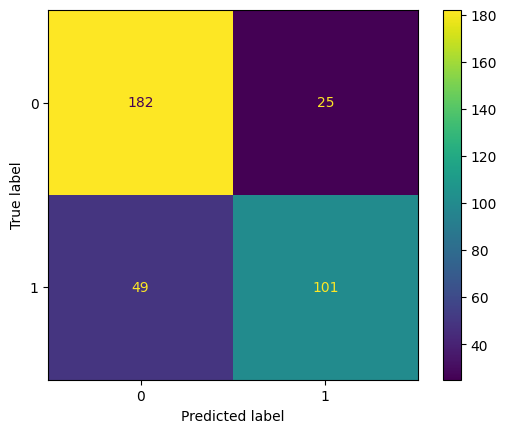

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
print(classification_report(y_test,predictions))

# Imprimindo a Matriz de Confusão
conf_mat = confusion_matrix(y_test, predictions)
print(conf_mat)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()

**Vamos testar o modelo com nossos dados:**

In [ ]:
# Rodrigo "Jack"
# Pclass: 3 (viajando na terceira classe)
# Age: 20 (anos)
# SibSP: 0 (acompanhado da esposa)
# Parch: 0 (não acompanhado dos filhos)
# Fare: 5.00 (valor da passagem)
# male: 1 (sexo masculino)
# Q S 0 1 (embarcado no porto de S)
pclass = int(input('Classe 1, 2 ou 3? '))
age = int(input('Entre sua idade: '))
sibsp = int(input('Quantos adultos lhe acompanham? '))
parch = int(input('Quantos filhos menores o acompanham? '))
fare = int(input('Valor pago da passagem: '))
male = int(input('Homem(1) ou mulher(0): '))
q = int(input('Veio de Queenstown? (1-sim, 0-não) '))
s = int(input('Veio de Southampton? (1-sim, 0-não) '))

#Criar um vetor com os dados e passar como argumento do método predict().

dados = np.array([pclass,age,sibsp,parch,fare,male,q,s]).reshape((1,-1))

# resultado: 0 = não sobreviveu 1 = sobreviveu
resultado = logmodel.predict(dados)[0]
if resultado == 1: print('Viveu')
else: print('Morreu')

Classe 1, 2 ou 3? 3
Entre sua idade: 20
Quantos adultos lhe acompanham? 0
Quantos filhos menores o acompanham? 0
Valor pago da passagem: 5
Homem(1) ou mulher(0): 1
Veio de Queenstown? (1-sim, 0-não) 0
Veio de Southampton? (1-sim, 0-não) 1
Morreu


In [ ]:
# "Letícia Rose"
# Pclass: 1
# Age: 19 (anos)
# SibSP: 1 (acompanhado da mãe)
# Parch: 0 (não acompanhado dos filhos)
# Fare: 200 (valor da passagem)
# male: 0 (sexo feminino)
# Q S 1 0 (embarcado no porto de Q)
pclass = int(input('Classe 1, 2 ou 3? '))
age = int(input('Entre sua idade: '))
sibsp = int(input('Quantos adultos lhe acompanham? '))
parch = int(input('Quantos filhos menores o acompanham? '))
fare = int(input('Valor pago da passagem: '))
male = int(input('Homem(1) ou mulher(0): '))
q = int(input('Veio de Queenstown? (1-sim, 0-não) '))
s = int(input('Veio de Southampton? (1-sim, 0-não) '))

#Criar um vetor com os dados e passar como argumento do método predict().

dados = np.array([pclass,age,sibsp,parch,fare,male,q,s]).reshape((1,-1))

# resultado: 0 = não sobreviveu 1 = sobreviveu
resultado = logmodel.predict(dados)[0]
if resultado == 1: print('Viveu')
else: print('Morreu')

Classe 1, 2 ou 3? 1
Entre sua idade: 19
Quantos adultos lhe acompanham? 1
Quantos filhos menores o acompanham? 0
Valor pago da passagem: 200
Homem(1) ou mulher(0): 0
Veio de Queenstown? (1-sim, 0-não) 1
Veio de Southampton? (1-sim, 0-não) 0
Viveu
